In [1]:
import matplotlib.pyplot as plt
import numpy as np

Goal of this notebook is to do an initial simple ackermann model estimate of the system
1. GPS Ground speed to shaft speed via magnetic encoder.
2. PWM to ground speed via GPS
3. PWM to angular heading rate change via GPS

In [36]:
class Cal_Data:
    pwm_to_shaft_speed = 1.0
    pwm_to_shaft_speed_variance = 1.0
    
    pwm_to_ground_speed = 1.0
    pwm_to_ground_speed_variance = 1.0
    
    shaft_speed_to_ground_speed = 1.0
    shaft_speed_to_ground_speed_variance = 1.0
    
    
    def get_shaft_speed_from_PWM(self, pwm):
        # This takes in the pwm and returns the shaft speed
        return (pwm-1500.0) * self.pwm_to_shaft_speed

    def get_shaft_speed_from_ground_speed(self, ground_speed):
        # This takes in the ground speed and returns the shaft speed
        return ground_speed * self.ground_speed_to_shaft_speed
    
    def get_ground_speed_from_PWM(self, pwm):
        # This takes in the throttle PWM and returns the ground speed
        return (pwm-1500.0) * self.pwm_to_ground_speed
    
    def estimate_pwm_to_shaft_speed(self, pwms, shaft_speeds):
        # This takes in a set of time-aligned steady-state (pwm and shaft speed) pairs.
        # Then, it estimates the linear fit of the two using least squares
        x = pwms - 1500.0
        x = x[:,np.newaxis] # Our x matrix is one dimensional, it needs to be two dimensional to use lstsq so:
        est = np.linalg.lstsq(x, shaft_speeds, rcond=None)
        self.pwm_to_shaft_speed = est[0][0]
        self.pwm_to_shaft_speed_variance = est[1][0] / shaft_speeds.shape[0]
        
    def estimate_pwm_to_ground_speed(self, pwms, ground_speeds):
        # This takes in a set of time-aligned and steady-state (pwm and ground speed) pairs.
        # Then, it estimates the linear fit of the two using least squares
        x = pwms - 1500.0
        x = x[:,np.newaxis] # Our x matrix is one dimensional, it needs to be two dimensional to use lstsq so:
        est  = np.linalg.lstsq(x, ground_speeds)
        self.pwm_to_ground_speed = est[0][0]
        self.pwm_to_ground_speed_variance = est[1][0] / ground_speeds.shape[0]
        
    def estimate_shaft_speed_to_ground_speed(self, shaft_speeds, ground_speeds):
        # This takes in a set of time-aligned steady-state (shaft speed and ground speed) pairs.
        # Then, it estimates the linear fit of the two using least squares
        x = shaft_speeds[:,np.newaxis] # Our x matrix is one dimensional, it needs to be two dimensional to use lstsq so:
        est = np.linalg.lstsq(x, ground_speeds)
        self.shaft_speed_to_ground_speed = est[0][0]
        self.shaft_speed_to_ground_speed_variance = est[1][0] / shaft_speeds.shape[0]
            
    

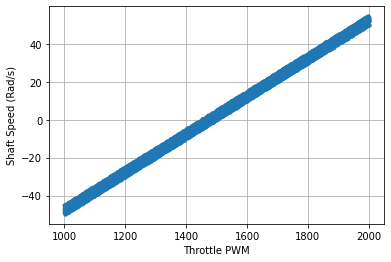

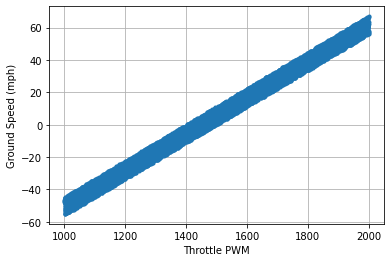

Estimate:  0.1000384207363282
Estimate:  8.345203547494298


In [38]:
# Ground speed to magnetic encoder
# - This should be linear and based on the gearing of the drive shaft to the wheels / drive shaft to the motor
# - shaft_encoder_speed (Rad/s) = f(PWM)
# - shaft_encoder_speed (Rad/s) = f(speed)
# - speed (m/s) = f(pwm)

cal_data = Cal_Data()

gt_pwm_to_ground_speed = 1.0
gt_pwm_to_shaft_speed = 0.1
gt_pwm_to_ground_speed = 0.05

n_samples = 10000
pwms = np.random.rand(n_samples) * 1000 + 1000.
shaft_speeds = (pwms - 1500.) * gt_pwm_to_shaft_speed + 5.0 * np.random.rand(n_samples)
ground_speeds = (pwms - 1500.) * gt_pwm_to_ground_speed + 5.0 * np.random.rand(n_samples)

plt.plot(pwms, shaft_speeds, '.')
plt.grid()
plt.xlabel("Throttle PWM")
plt.ylabel("Shaft Speed (Rad/s)")
plt.show()


plt.plot(pwms, ground_speeds * 2.23693629, '.')
plt.grid()
plt.xlabel("Throttle PWM")
plt.ylabel("Ground Speed (mph)")
plt.show()

cal_data.estimate_pwm_to_shaft_speed(pwms=pwms, shaft_speeds=shaft_speeds)
print("Estimate: ", cal_data.pwm_to_shaft_speed)
print("Estimate: ", cal_data.pwm_to_shaft_speed_variance)

for some reason the variance estimate is not correct....

C:\Users\sgtas\AppData\Local\Temp\ipykernel_31548\3184152516.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


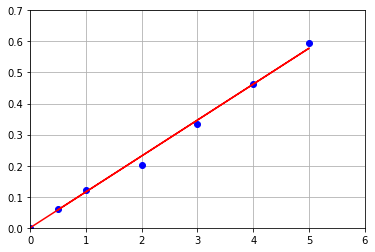

y = [0.11563801] x + 0


In [ ]:
# I'm adding a 0 in both x and y axis to force a line drawn.
x = np.array([0, 5, 4, 3, 2, 1, 0.5])
y = np.array([0, 0.596, 0.464, 0.333, 0.201, 0.121, 0.062])

# We only need a*x. so to figure out a we use lstsq from numpy
# Our x matrix is one dimensional, it needs to be two dimensional to use lstsq so:
x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y)

plt.plot(x, y, 'bo')
plt.plot(x, a*x, 'r-')
plt.xlim([0, 6])
plt.ylim([0, 0.7])
plt.grid()
plt.show()
print(f"y = {a} x + 0")